In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
data1 = pd.read_csv('databaru_eda.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [4]:
data1.describe()

,Total,Influneza A,Influneza B,Male,Female,0–5 months,6–11 months,1 year,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,10–14 years,15–19 years,20–29 years,30–39 years,40–49 years,50–59 years,60–69 years,70–79 years,80 years and over,Temperature,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Vapour pressure,Year,Month,Day
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1036.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,89.648412,65.614458,24.033954,46.119934,43.528478,0.173056,0.568456,2.077218,2.274918,2.618291,3.576670,3.900876,4.146769,4.094743,3.554765,2.993428,9.803943,3.969332,8.701533,10.145674,10.761227,6.560789,4.165389,2.954545,2.606791,16.800274,13.642826,20.751205,68.463308,3.489321,8.633687,15.078861,2016.999452,6.523549,15.727820
std,192.997424,159.349225,77.438548,100.150245,93.145987,0.538549,1.393516,4.786288,5.289224,6.111429,8.249658,9.078322,9.668156,9.840832,8.586610,7.254282,22.328627,8.896245,19.326727,21.640617,23.675245,15.059512,9.883044,7.304389,6.174170,7.578086,7.860737,7.728856,15.804873,1.199745,18.178031,8.564782,1.414407,3.449478,8.801735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,-2.700000,3.600000,28.000000,1.300000,0.000000,2.200000,2015.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.600000,6.200000,13.900000,57.000000,2.600000,0.000000,7.225000,2016.000000,4.000000,8.000000
50%,8.000000,5.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.400000,14.300000,21.100000,71.000000,3.200000,1.000000,13.600000,2017.000000,7.000000,16.000000
75%,62.000000,37.750000,9.000000,31.750000,32.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,7.000000,3.000000,6.000000,8.000000,8.000000,4.000000,3.000000,2.000000,2.000000,22.800000,20.300000,26.800000,80.000000,4.000000,9.625000,22.200000,2018.000000,10.000000,23.000000
max,1718.000000,1717.000000,981.000000,931.000000,787.000000,4.000000,12.000000,43.000000,55.000000,66.000000,69.000000,78.000000,105.000000,101.000000,80.000000,74.000000,211.000000,66.000000,173.000000,210.000000,200.000000,150.000000,82.000000,71.000000,47.000000,31.600000,27.800000,37.400000,99.000000,9.000000,192.500000,33.600000,2019.000000,12.000000,31.000000


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1826 non-null   object 
 1   Total                1826 non-null   int64  
 2   Influneza A          1826 non-null   int64  
 3   Influneza B          1826 non-null   int64  
 4   Male                 1826 non-null   int64  
 5   Female               1826 non-null   int64  
 6   0–5 months           1826 non-null   int64  
 7   6–11 months          1826 non-null   int64  
 8   1 year               1826 non-null   int64  
 9   2 years              1826 non-null   int64  
 10  3 years              1826 non-null   int64  
 11  4 years              1826 non-null   int64  
 12  5 years              1826 non-null   int64  
 13  6 years              1826 non-null   int64  
 14  7 years              1826 non-null   int64  
 15  8 years              1826 non-null   i

In [6]:
drop_cols = [
    "Influneza A", "Influneza B","Male", "Female", "0–5 months", "6–11 months", "1 year", "2 years", "3 years", "4 years", "5 years",
    "6 years", "7 years", "8 years", "9 years",
    "10–14 years", "15–19 years", "20–29 years",
    "30–39 years", "40–49 years", "50–59 years",
    "60–69 years", "70–79 years", "80 years and over",
    "Temperature", "Minimum Temperature", "Maximum Temperature",
    "Year", "Month", "Day",
]

df_clean = data1.drop(columns=[c for c in drop_cols if c in data1.columns])
df_clean["Date"] = pd.to_datetime(
    df_clean["Date"],
    format="%Y/%m/%d"
)
df_clean["Year"] = df_clean["Date"].dt.year
print(df_clean.columns.tolist())

['Date', 'Total', 'Relative humidity', 'Wind speed', 'Rainfall', 'Sunshine duration', 'Vapour pressure', 'Year']


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1826 non-null   datetime64[ns]
 1   Total              1826 non-null   int64         
 2   Relative humidity  1826 non-null   int64         
 3   Wind speed         1826 non-null   float64       
 4   Rainfall           1036 non-null   float64       
 5   Sunshine duration  1826 non-null   object        
 6   Vapour pressure    1826 non-null   float64       
 7   Year               1826 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(1)
memory usage: 107.1+ KB


In [8]:
df_clean.isnull().sum()

Date                   0
Total                  0
Relative humidity      0
Wind speed             0
Rainfall             790
Sunshine duration      0
Vapour pressure        0
Year                   0
dtype: int64

In [9]:
ts = data1['Total'].astype(float)
ts = df_clean.set_index("Date")["Total"] 

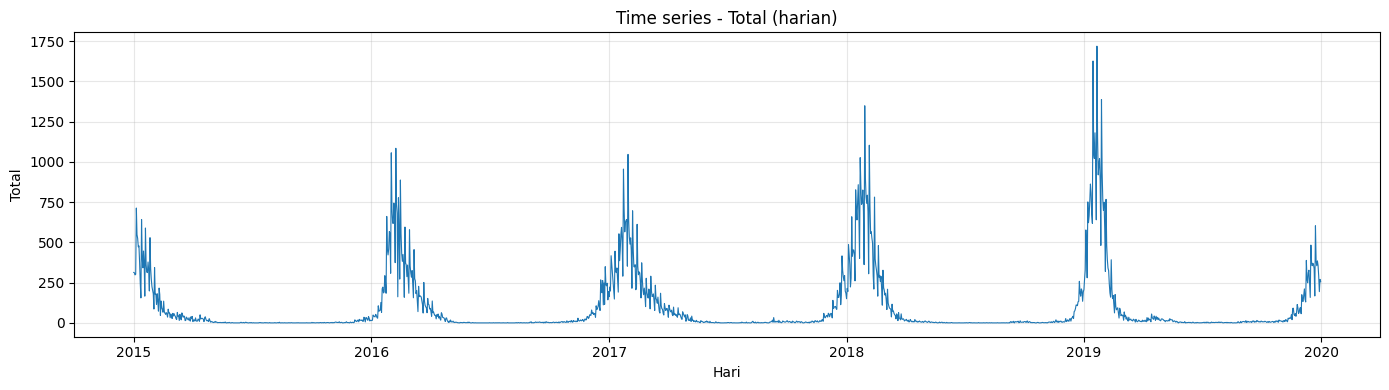

In [10]:
plt.figure(figsize=(14,4))
plt.plot(ts, linewidth=0.8)
plt.title('Time series - Total (harian)')
plt.xlabel('Hari')
plt.ylabel('Total')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

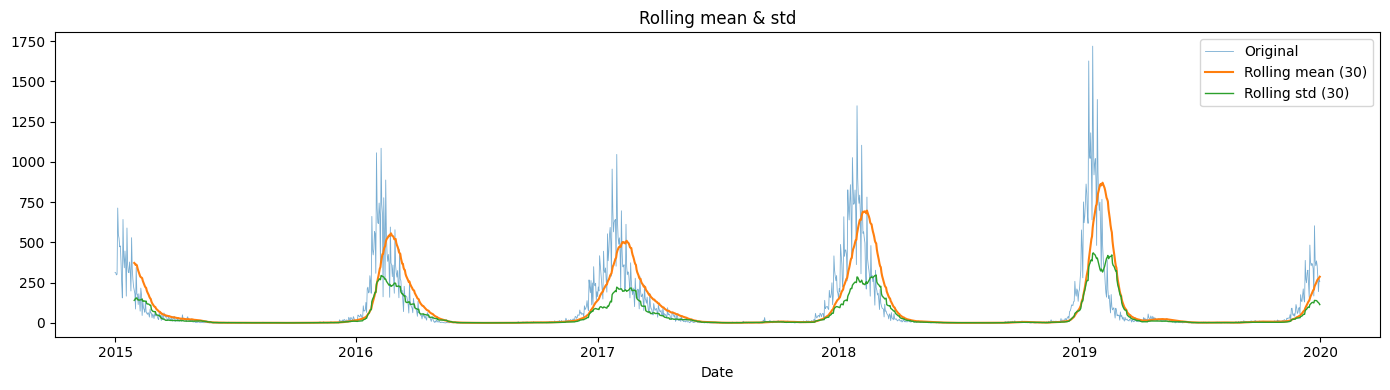

In [11]:
window = 30 
rolling_mean = ts.rolling(window=window).mean()
rolling_std  = ts.rolling(window=window).std()

plt.figure(figsize=(14,4))
plt.plot(ts, label='Original', alpha=0.6, linewidth=0.6)
plt.plot(rolling_mean, label=f'Rolling mean ({window})', linewidth=1.5)
plt.plot(rolling_std, label=f'Rolling std ({window})', linewidth=1.0)
plt.legend()
plt.title('Rolling mean & std')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

C:\Users\MADEYZ\AppData\Local\Temp\ipykernel_18068\769884528.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_month = ts.resample('M').sum()


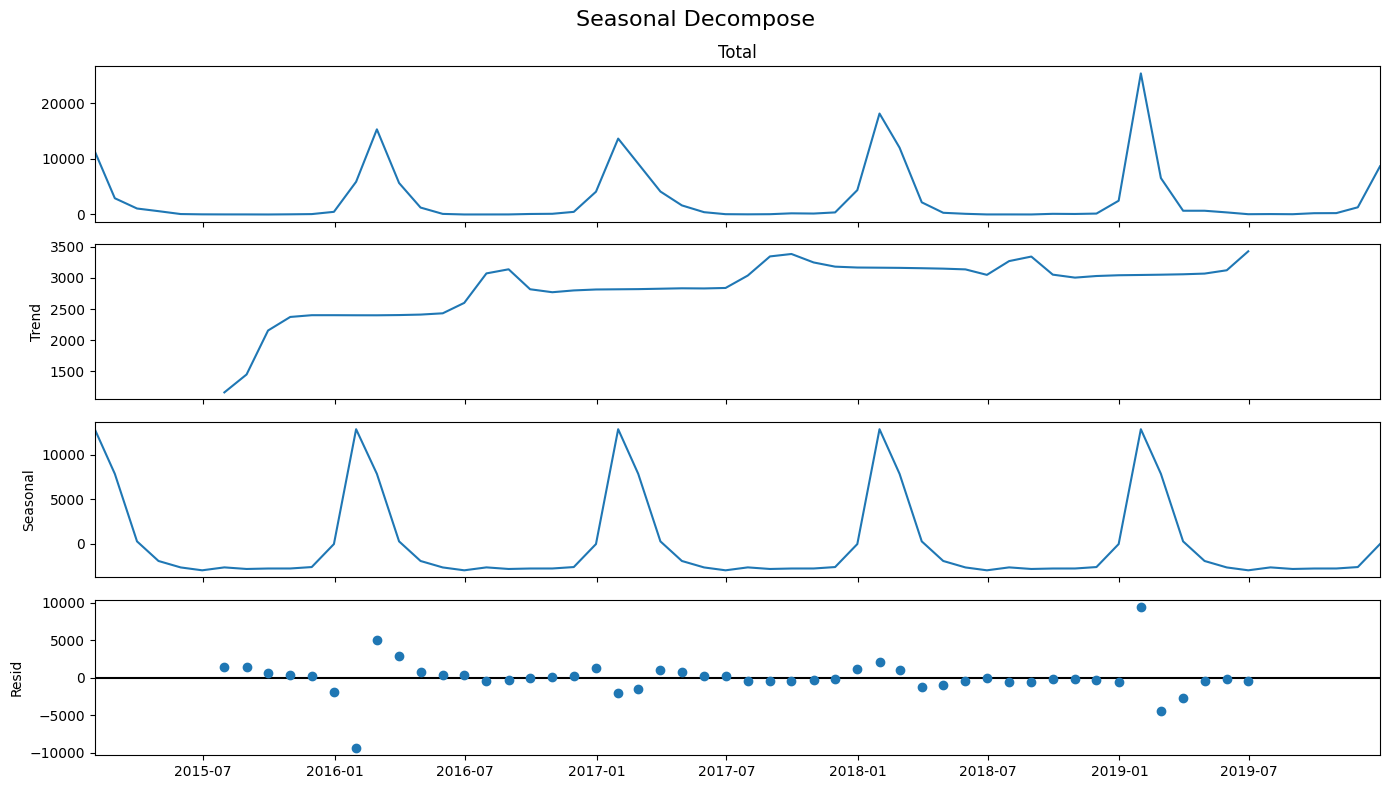

In [12]:
ts_month = ts.resample('M').sum()
freq = None
result = seasonal_decompose(ts_month if len(ts_month)>24 else ts, model='additive', period=12)
plt.rcParams.update({'figure.figsize': (14,8)})
result.plot().suptitle('Seasonal Decompose', fontsize=16)
plt.tight_layout()
plt.show()

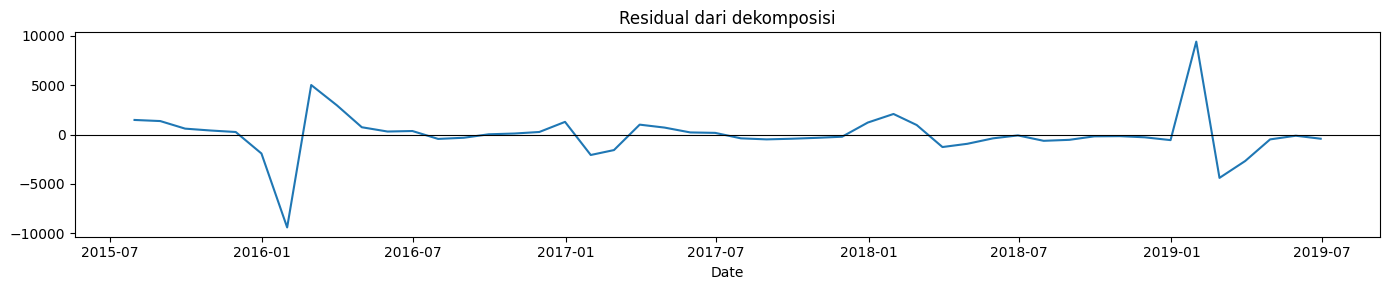

In [13]:
resid = result.resid.dropna()
plt.figure(figsize=(14,3))
plt.plot(resid)
plt.title('Residual dari dekomposisi')
plt.xlabel('Date')
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

In [14]:
adf_result = adfuller(data1['Total'])
adf_result

# output (adf_statistic, p_value, used_lag, n_obs, critical_values, icbest)

(-4.762877162523034,
 6.401272048569019e-05,
 22,
 1803,
 {'1%': -3.4339820768018106,
  '5%': -2.8631443597478143,
  '10%': -2.567624108684946},
 19702.551373257367)

ADF statistic = -4.763

p-value = 0.000064

Keputusan:

0.000064 < 0.05 

-4.763 < -3.434 (CV 1%) 

Keduanya terpenuhi → H₀ DITOLAK (data stationer)

# Arima

<Figure size 1400x500 with 0 Axes>

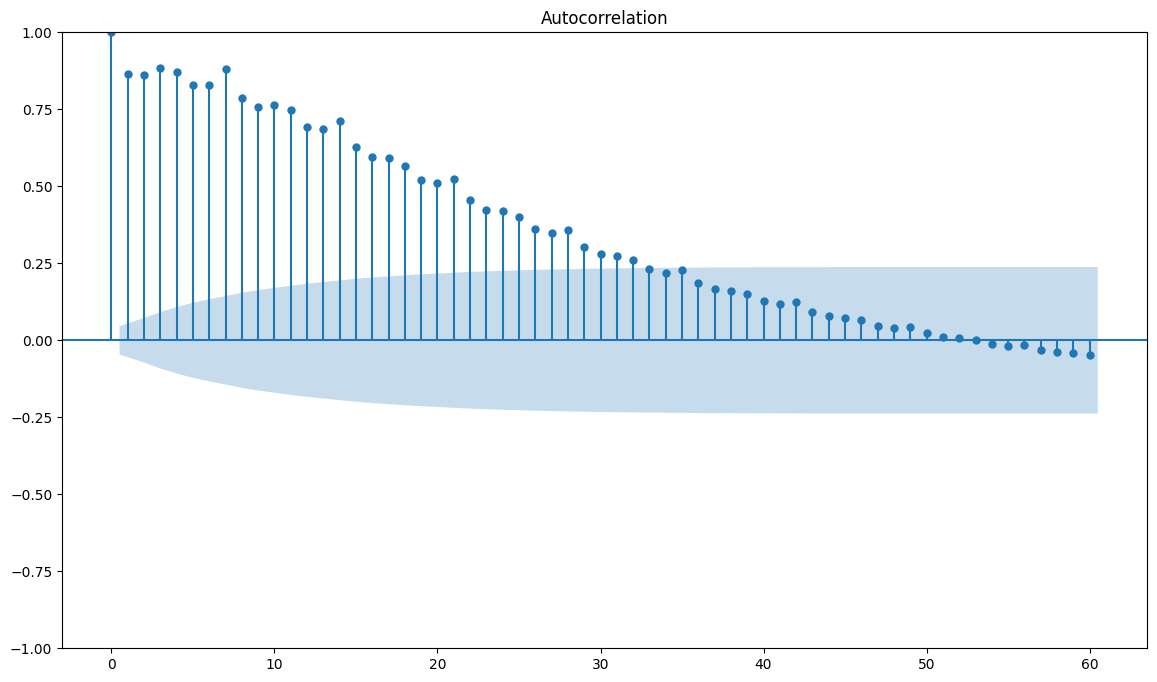

<Figure size 1400x500 with 0 Axes>

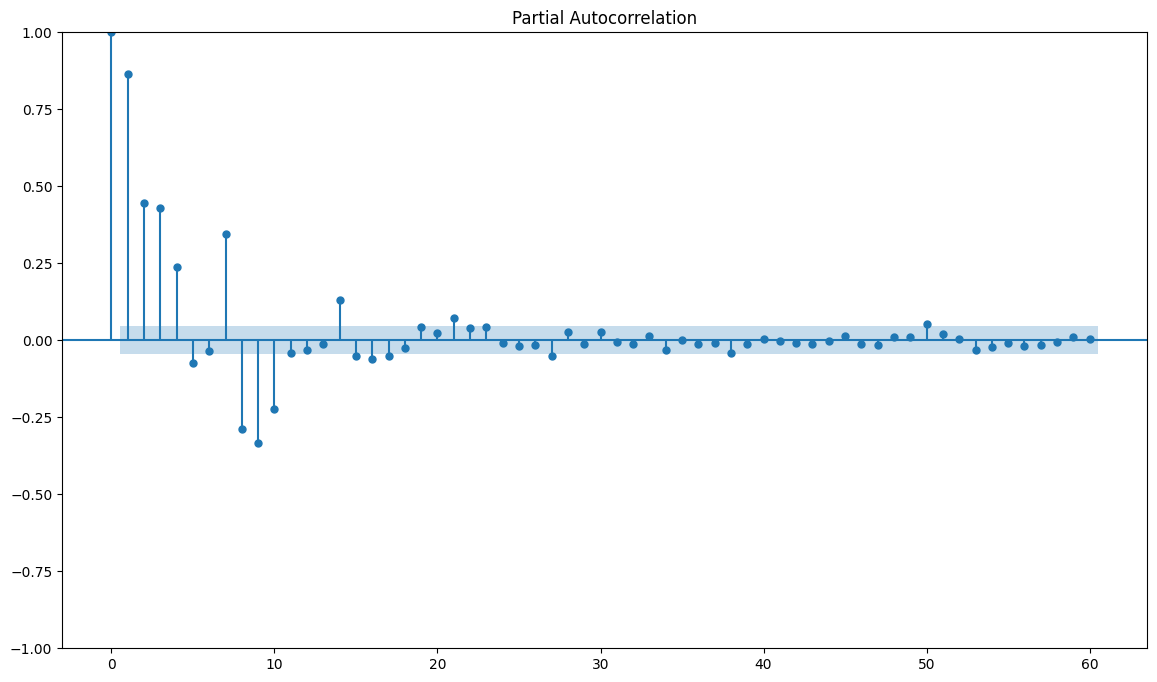

In [15]:
plt.figure(figsize=(14,5))
plot_acf(data1['Total'], lags=60)
plt.show()

plt.figure(figsize=(14,5))
plot_pacf(data1['Total'], lags=60)
plt.show()

Karena data terbukti secara plot adalah data seasonal maka kita lakukan diferencing supaya bisa dilihat kita mengambil lags berapa

In [16]:
ts_diff = ts.diff().dropna()


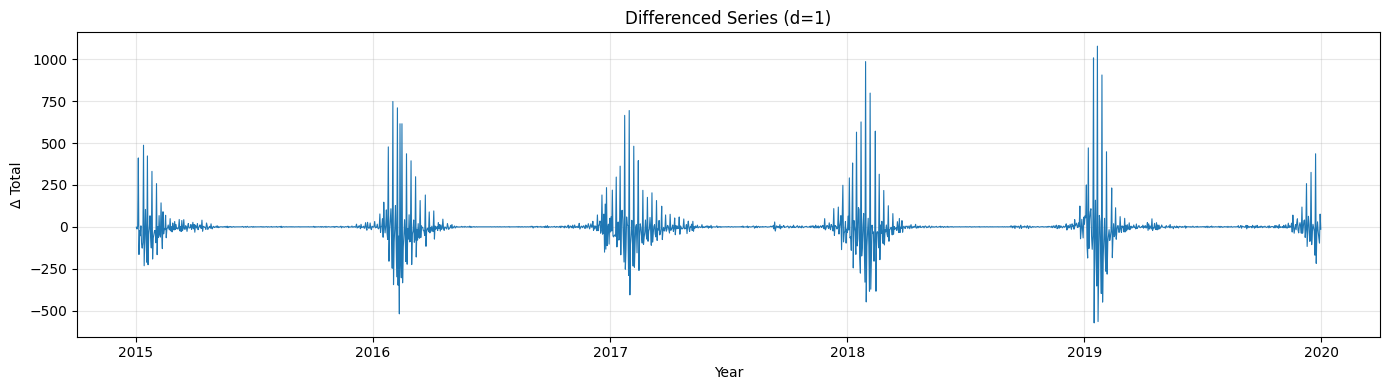

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(ts_diff, linewidth=0.8)
plt.title("Differenced Series (d=1)")
plt.xlabel("Year")
plt.ylabel("Δ Total")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [18]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(ts_diff)

print("ADF Statistic :", adf_result[0])
print("p-value       :", adf_result[1])


ADF Statistic : -9.956454201123192
p-value       : 2.4369563836728616e-17


p-value < 0.05 → tolak H₀ → STASIONER

# Sarima

<Figure size 1400x500 with 0 Axes>

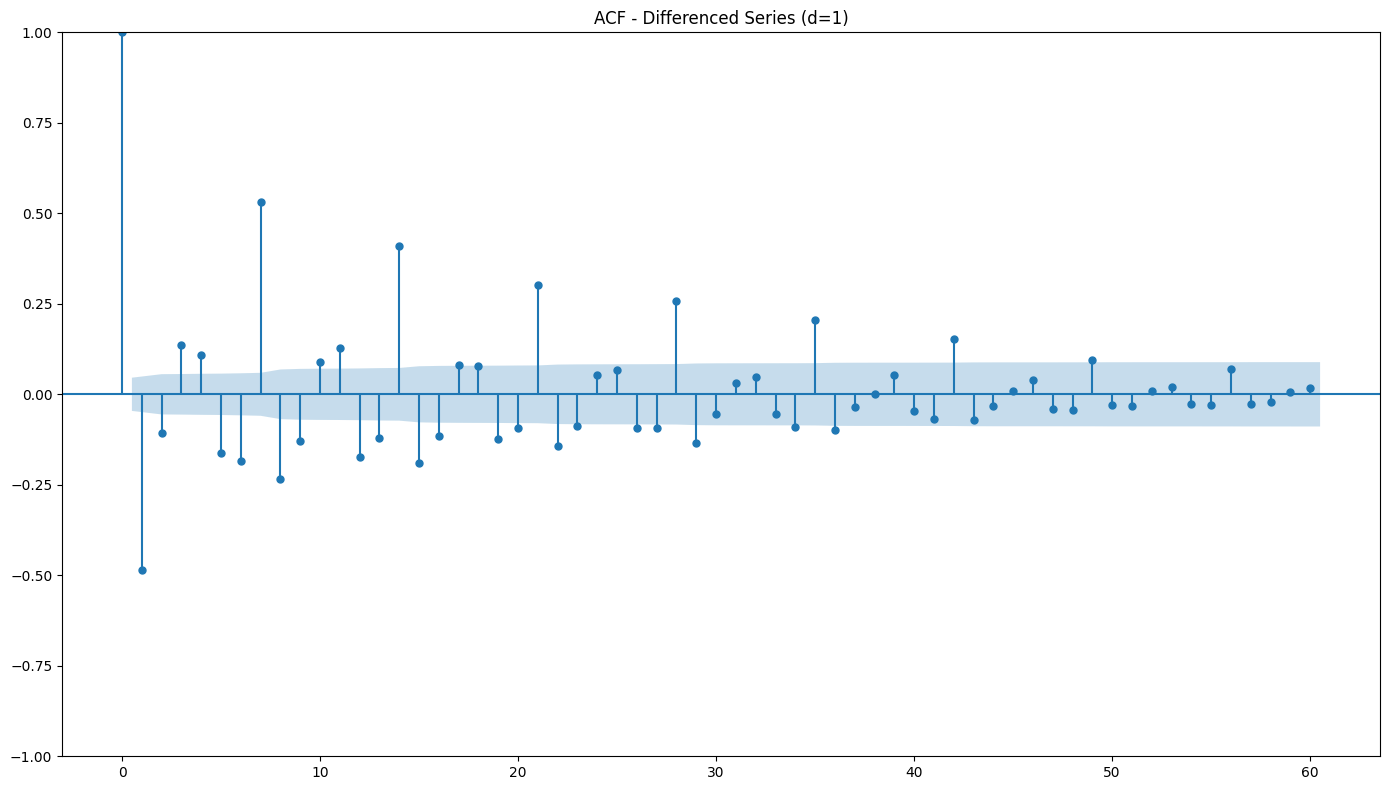

<Figure size 1400x500 with 0 Axes>

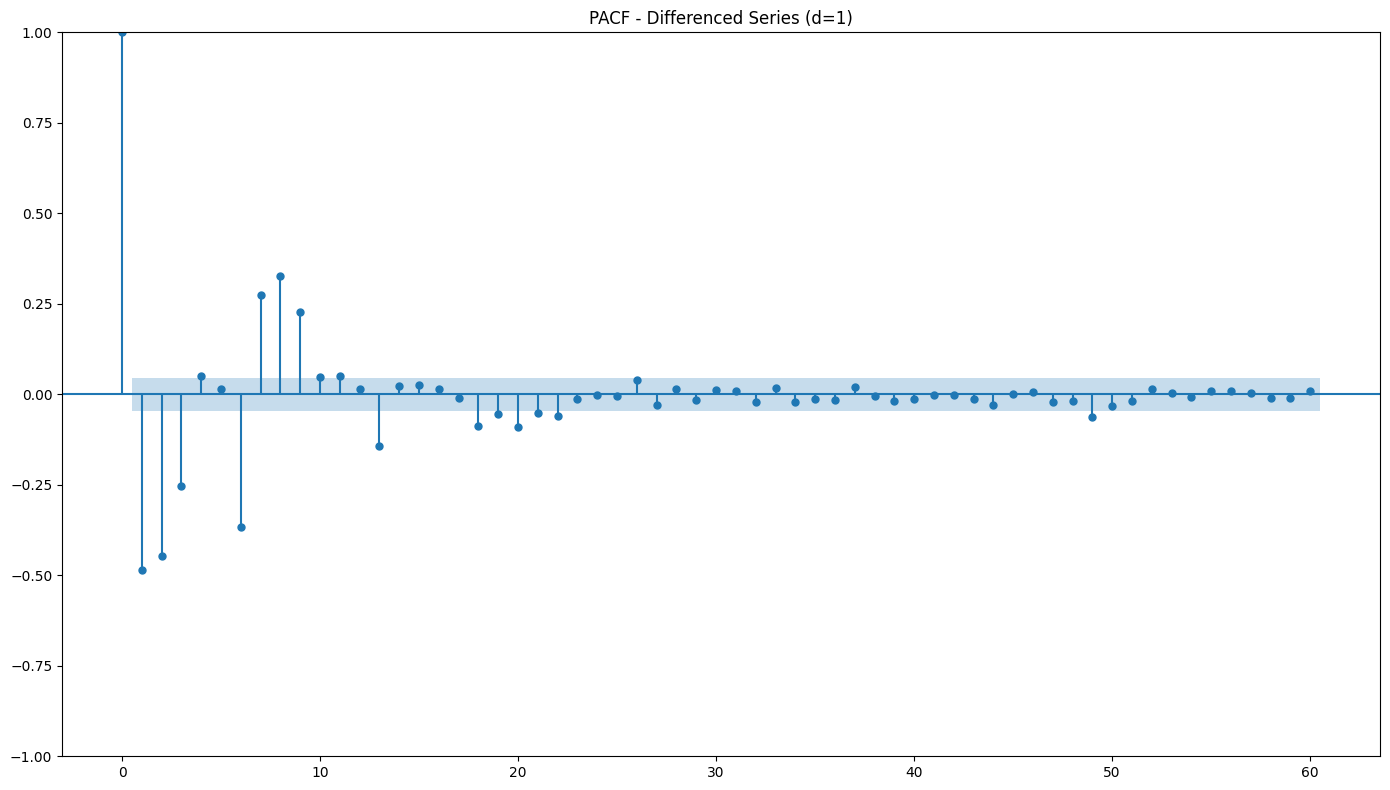

In [19]:
plt.figure(figsize=(14,5))
plot_acf(ts_diff, lags=60)
plt.title("ACF - Differenced Series (d=1)")
plt.tight_layout()
plt.show()

# ---- PACF ----
plt.figure(figsize=(14,5))
plot_pacf(ts_diff, lags=60)
plt.title("PACF - Differenced Series (d=1)")
plt.tight_layout()
plt.show()

Order Sarima (3,1,1,7)

# Model Sarima

In [20]:
model1 = sm.tsa.statespace.SARIMAX(
    data1['Total'],
    order=(1,1,1),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result1 = model1.fit()
print(result1.summary())


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                 1826
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -10539.222
Date:                Wed, 10 Dec 2025   AIC                          21084.443
Time:                        10:21:55   BIC                          21100.968
Sample:                             0   HQIC                         21090.539
                               - 1826                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1705      0.017    -10.127      0.000      -0.203      -0.137
ma.L1         -0.6091      0.013    -46.358      0.000      -0.635      -0.583
sigma2      6152.0680     57.475    107.039      0.0

In [21]:
import statsmodels.api as sm

model1 = sm.tsa.statespace.SARIMAX(
    data1['Total'],
    order=(1,0,1),
    seasonal_order=(3,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result1 = model1.fit()
print(result1.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             Total   No. Observations:                 1826
Model:             SARIMAX(1, 0, 1)x(3, 1, 1, 7)   Log Likelihood               -9962.294
Date:                           Wed, 10 Dec 2025   AIC                          19938.589
Time:                                   10:22:01   BIC                          19977.046
Sample:                                        0   HQIC                         19952.786
                                          - 1826                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9770      0.002    428.020      0.000       0.973       0.981
ma.L1         -0.6795      0.009    -78.500

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
aic_arima = ARIMA(ts, order=(1,0,1)).fit().aic
aic_sarima = SARIMAX(ts, order=(1,0,1), seasonal_order=(3,1,1,7)).fit().aic

print("AIC ARIMA :", aic_arima)
print("AIC SARIMA:", aic_sarima)


c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was prov

AIC ARIMA : 21147.84578693389
AIC SARIMA: 20287.013427386504


# Model Sarima

In [23]:
import statsmodels.api as sm

model1 = sm.tsa.statespace.SARIMAX(
    data1['Total'],
    order=(3,0,1),
    seasonal_order=(3,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result1 = model1.fit()
print(result1.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             Total   No. Observations:                 1826
Model:             SARIMAX(3, 0, 1)x(3, 1, 1, 7)   Log Likelihood               -9874.688
Date:                           Wed, 10 Dec 2025   AIC                          19767.376
Time:                                   10:22:22   BIC                          19816.811
Sample:                                        0   HQIC                         19785.627
                                          - 1826                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4580      0.023     19.731      0.000       0.413       0.504
ar.L2          0.2562      0.012     21.758

In [24]:
aic_arima = ARIMA(ts, order=(3,0,1)).fit().aic
aic_sarima = SARIMAX(ts, order=(3,0,1), seasonal_order=(3,1,1,7)).fit().aic

print("AIC ARIMA :", aic_arima)
print("AIC SARIMA:", aic_sarima)

c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

AIC ARIMA : 21017.138129611085
AIC SARIMA: 20174.666032541078


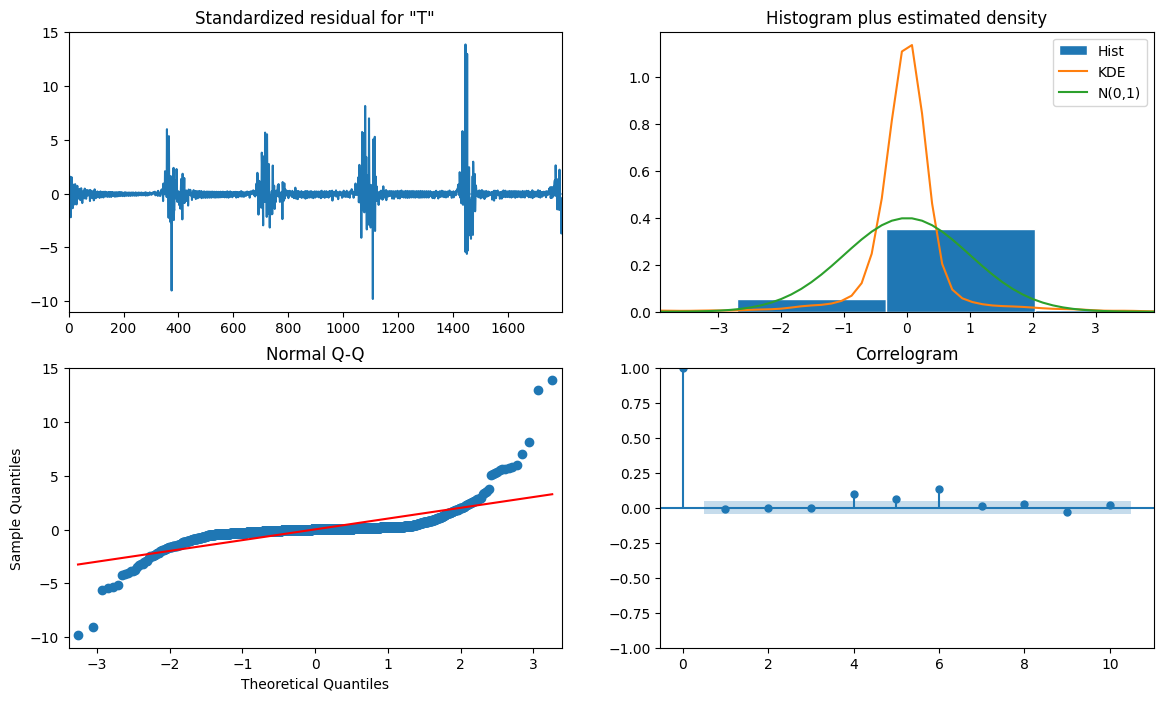

In [25]:
result1.plot_diagnostics(figsize=(14,8))
plt.show()


c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MSE  : 6079.687
MAE  : 56.499
RMSE : 77.972
MAPE : 20.62 %


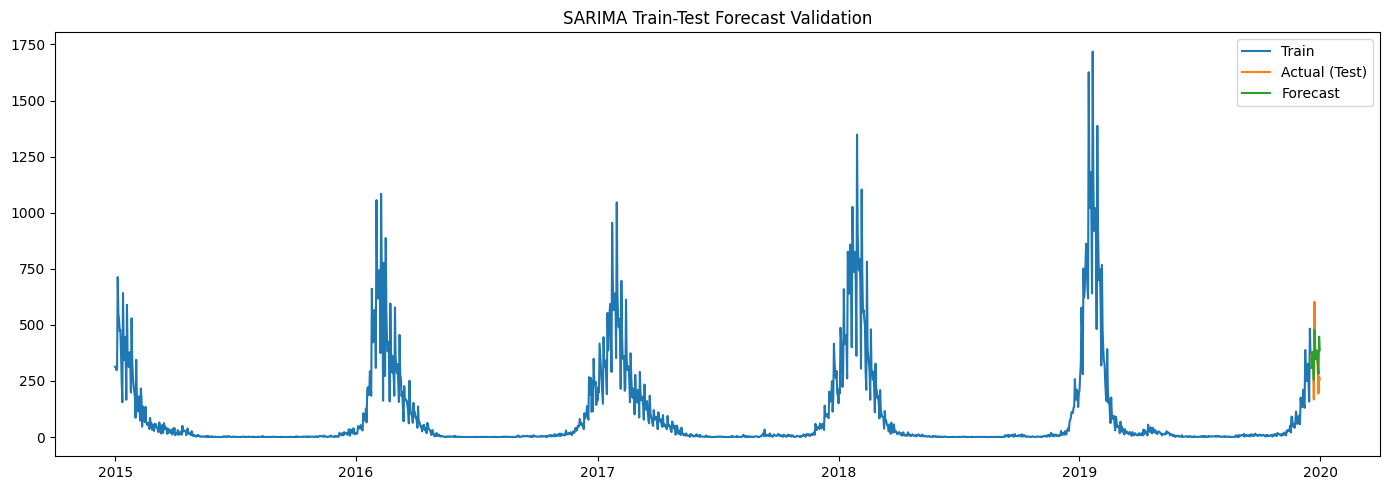

In [40]:
import numpy as np

test_size = 14                       # sesuai horizon forecast
train = ts.iloc[:-test_size]
test  = ts.iloc[-test_size:]
model = SARIMAX(
    train,
    order=(3,0,1),
    seasonal_order=(3,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

res = model.fit()
forecast = res.get_forecast(steps=test_size)
pred = forecast.predicted_mean

mse = mean_squared_error(test, pred)
mae  = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))
mape = np.mean(np.abs((test - pred) / test)) * 100

print(f"MSE  : {mse:.3f}")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"MAPE : {mape:.2f} %")

plt.figure(figsize=(14,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual (Test)')
plt.plot(pred.index, pred, label='Forecast')

plt.legend()
plt.title('SARIMA Train-Test Forecast Validation')
plt.tight_layout()
plt.show()


# Model Sarimax

In [27]:
exog_cols = ['Relative humidity', 'Wind speed',
             'Sunshine duration', 'Vapour pressure']

df_clean[exog_cols] = df_clean[exog_cols].apply(
    lambda x: pd.to_numeric(x, errors='coerce')
)


In [28]:
print(df_clean.dtypes)


Date                 datetime64[ns]
Total                         int64
Relative humidity             int64
Wind speed                  float64
Rainfall                    float64
Sunshine duration           float64
Vapour pressure             float64
Year                          int32
dtype: object


In [29]:
df_clean['Sunshine duration'] = pd.to_numeric(
    df_clean['Sunshine duration'],
    errors='coerce'
)


In [30]:
print(df_clean.dtypes)

Date                 datetime64[ns]
Total                         int64
Relative humidity             int64
Wind speed                  float64
Rainfall                    float64
Sunshine duration           float64
Vapour pressure             float64
Year                          int32
dtype: object


In [31]:
print(data1[exog_cols].dtypes)


Relative humidity      int64
Wind speed           float64
Sunshine duration     object
Vapour pressure      float64
dtype: object


In [32]:
df_clean['Sunshine duration'] = df_clean['Sunshine duration'].fillna(df_clean['Sunshine duration'].mean())


In [33]:
df_clean.isnull().sum()

Date                   0
Total                  0
Relative humidity      0
Wind speed             0
Rainfall             790
Sunshine duration      0
Vapour pressure        0
Year                   0
dtype: int64

In [ ]:
exog_cols = ['Relative humidity', 'Wind speed',
             'Sunshine duration', 'Vapour pressure']

model1 = sm.tsa.statespace.SARIMAX(
    df_clean['Total'],
    exog=df_clean[exog_cols],
    order=(3,0,1),
    seasonal_order=(3,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result1 = model1.fit(alpha=0.05)
print(result1.summary())


c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: alpha. After release 0.14, this will raise.
  warnings.warn(
c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                             Total   No. Observations:                 1826
Model:             SARIMAX(3, 0, 1)x(3, 1, 1, 7)   Log Likelihood               -9879.569
Date:                           Wed, 10 Dec 2025   AIC                          19785.138
Time:                                   10:22:57   BIC                          19856.543
Sample:                                        0   HQIC                         19811.500
                                          - 1826                                         
Covariance Type:                             opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Relative humidity    -0.3573      0.221     -1.615      0.106      -0.791       0.076
Wind speed           -

In [35]:
residuals = result1.resid
lb = sm.stats.acorr_ljungbox(res.resid, lags=[10,20,30], return_df=True)
print(lb)

       lb_stat     lb_pvalue
10   99.989252  5.476760e-17
20  124.933235  3.454756e-17
30  139.427901  4.843578e-16


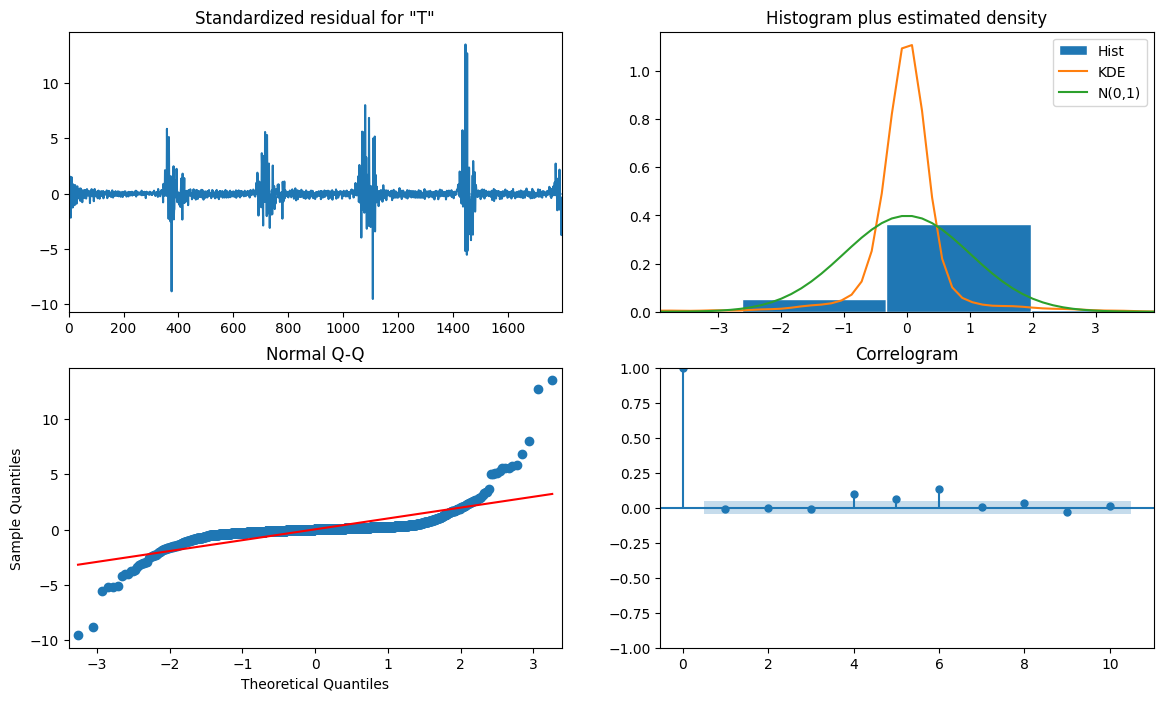

In [36]:
# Plot residual
result1.plot_diagnostics(figsize=(14,8))
plt.show()


In [37]:
n_forecast = 21
exog_future = df_clean[exog_cols].iloc[-n_forecast:]  # contoh placeholder

forecast_result = result1.get_forecast(steps=n_forecast, exog=exog_future)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

print(forecast_mean)
print(forecast_ci)

1826    242.929016
1827    214.884234
1828    235.280003
1829    186.682813
1830    107.213118
1831    198.076798
1832    173.092088
1833    154.908182
1834    150.005156
1835    150.851753
1836    125.452045
1837     64.948760
1838    120.625586
1839    111.564683
1840    105.585730
1841     94.695168
1842     97.350525
1843     75.640010
1844     35.594700
1845    106.405367
1846     83.954444
Name: predicted_mean, dtype: float64
      lower Total  upper Total
1826   125.082598   360.775434
1827    96.514537   333.253931
1828   111.682846   358.877160
1829    54.249554   319.116072
1830   -29.352924   243.779160
1831    56.845834   339.307763
1832    27.239412   318.944764
1833   -21.453052   331.269416
1834   -30.747903   330.758215
1835   -37.344141   339.047647
1836   -71.473682   322.377772
1837  -138.060659   267.958178
1838   -88.449073   329.700246
1839  -103.268354   326.397720
1840  -129.870649   341.042110
1841  -146.192940   335.583276
1842  -150.875892   345.576941
1843  

c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: alpha. After release 0.14, this will raise.
  warnings.warn(
c:\Users\MADEYZ\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE  : 56.322
MSE  : 6249.888
RMSE : 79.056
MAPE : 20.61 %


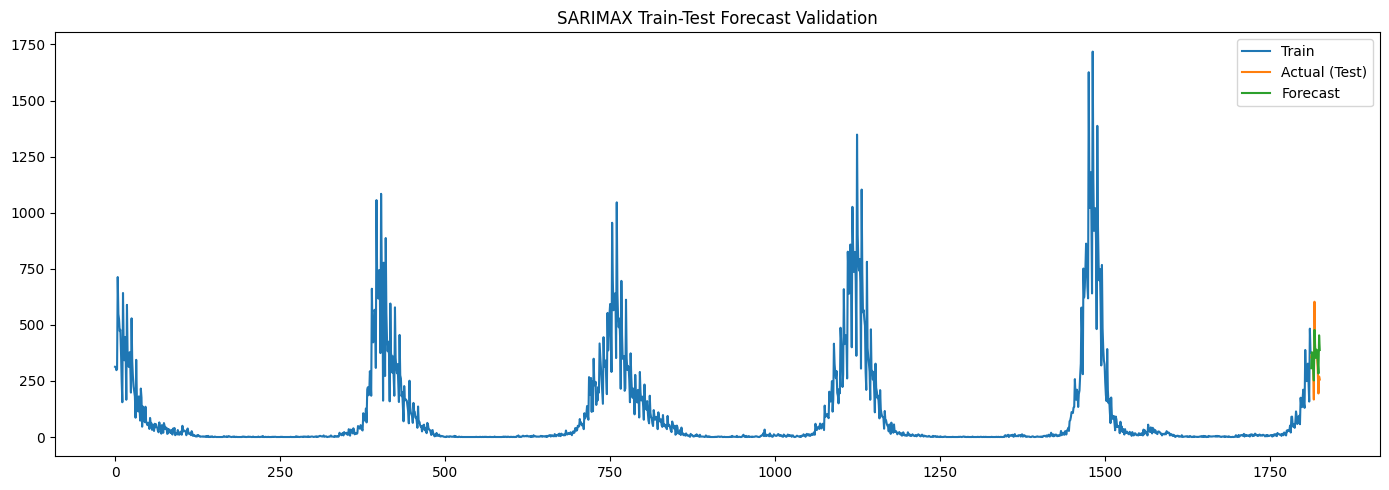

In [41]:
# eksogen
exog_cols = ['Relative humidity', 'Wind speed', 'Sunshine duration', 'Vapour pressure']

# data train–test
test = df_clean['Total'].iloc[-test_size:]
test_exog = df_clean[exog_cols].iloc[-test_size:]

train = df_clean['Total'].iloc[:-test_size]
train_exog = df_clean[exog_cols].iloc[:-test_size]

# model SARIMAX
model1 = sm.tsa.statespace.SARIMAX(
    train,
    exog=train_exog,
    order=(3,0,1),
    seasonal_order=(3,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result1 = model1.fit(alpha=0.05)

# forecasting
forecast = result1.get_forecast(steps=test_size, exog=test_exog)
pred = forecast.predicted_mean

# evaluasi error
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae  = mean_absolute_error(test, pred)
mse  = mean_squared_error(test, pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - pred) / test)) * 100

print(f"MAE  : {mae:.3f}")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"MAPE : {mape:.2f} %")

# plot
plt.figure(figsize=(14,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual (Test)')
plt.plot(pred.index, pred, label='Forecast')

plt.legend()
plt.title('SARIMAX Train-Test Forecast Validation')
plt.tight_layout()
plt.show()
